In [63]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import LeaveOneOut
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import GridSearchCV
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

# plt.style.use('seaborn-whitegrid')
sns.set()

本章将重点介绍一些机器学习的实用方法，主要使用[Scikit-Learn](http://scikitlearn.org)程序包。但本章并没有全面覆盖机器学习的每个领域，本章也不是`Scikit-Learn`的说明书。本章的主要目标如下：
+ 介绍机器学习的基本术语和概念
+ 介绍`Scikit-Learn`的API及用法示例
+ 详细介绍一些最重要的机器学习方法的具体用法和使用场景

## 5.1 什么是机器学习
机器学习经常被归类为人工智能的子领域，但我觉得这种归类方法存在误导嫌疑。虽然对机器学习的研究确实是源自人工智能领域，但是机器学习的方法却应用于数据科学领域，因此我认为把机器学习看作是一种数学建模更合适。

机器学习的本质就是借助数学模型理解数据。当我们给模型装上可以适应观测数据的可调参数时，“学习”就开始了；此时的程序被认为具有从数据中“学习”的能力。一旦模型可以拟合旧的观测数据，那么它们就可以预测并解释新的观测数据。在后面的内容中，我会分享一些关于这种数学方法的哲学闲话，你会发现数学模型的“学习”过程其实与人脑的“学习”过程相似。

由于理解机器学习问题的类型对于有效使用各种机器学习工具至关重要，因此首先介绍关于机器学习方法的若干分类。

### 5.1.1 机器学习的分类
机器学习一般可以分为两类：
+ `有监督学习`是指对数据的若干特征与若干标签之间的关联性进行建模的过程；只要模型被确定，就可以应用到新的未知数据上。这类学习过程可以进一步分为`分类`任务与`回归`。在分类任务中，标签都是离散值；而在回归任务中，标签都是连续值
+ `无监督学习`是指对不带任何标签的数据特征进行建模，通常被看成是一种“让数据自己介绍自己”的过程。这类模型包括`聚类`任务和`降维`任务。聚类算法可以将数据分成不同的组别，而降维算法追求用更简洁的方式表现数据

另外，还有一种半监督学习方法。半监督学习方法通常可以在数据标签不完整时使用。

### 5.1.2 机器学习应用的定性示例
下面来介绍一些简单的机器学习任务示例，让这些抽象理论显得更具体一点。这些例子都是我们在后面内容中将要看到的机器学习任务的直观、非量化形式，之后将更深入地介绍相关模型的具体用法。

#### 5.1.2.1 分类：预测离散标签
先来看一个简单的分类任务。假如我们有一些带标签的数据点，希望用这些信息为那些不带标签的数据点进行分类。假如这些数据点的分布如`图5-1`所示，每个数据点都有两个特征，在平面上用`(x,y)`表示；数据点用颜色表示类型标签，一共有两种类型，分别`红色`和`蓝色`表示。我们想根据这些特征和标签创建一个模型，帮助我们判断新的数据点是`蓝色`还是`红色`：
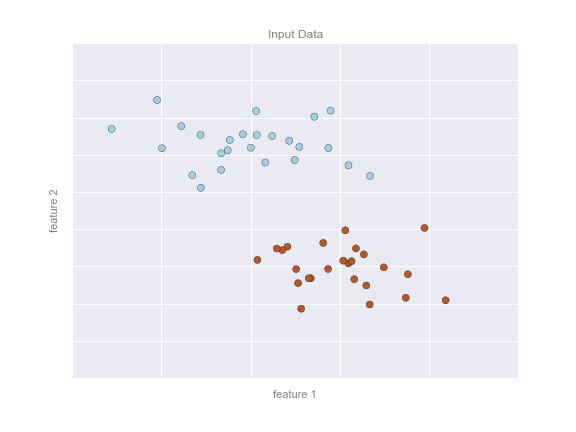


有许多可以解决分类任务的模型，这里先用最简单的一种。假设平面上有一条可以将两种类型分开的直线，直线的两侧分别是一种类型。那么，我们的模型其实就是“一条可以分类的直线”，而模型参数其实就是直线位置与方向的数值。这些模型参数的最优解都可以通过学习数据获得，这个过程通常被称为训练模型。`图5-2`是为这组数据分类而训练的模型：
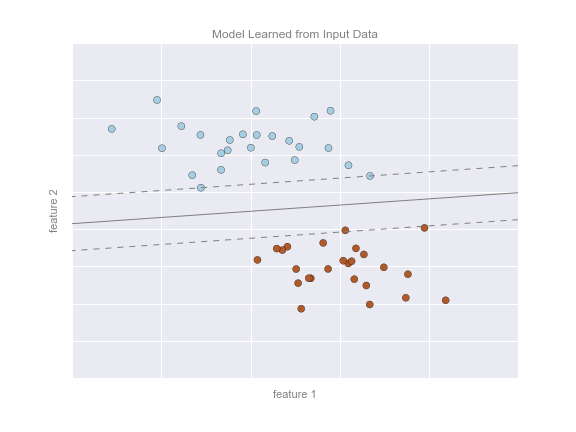

模型现在已经训练好了，可以对一个新的、不带标签的数据进行分类了，如`图5-3`所示：
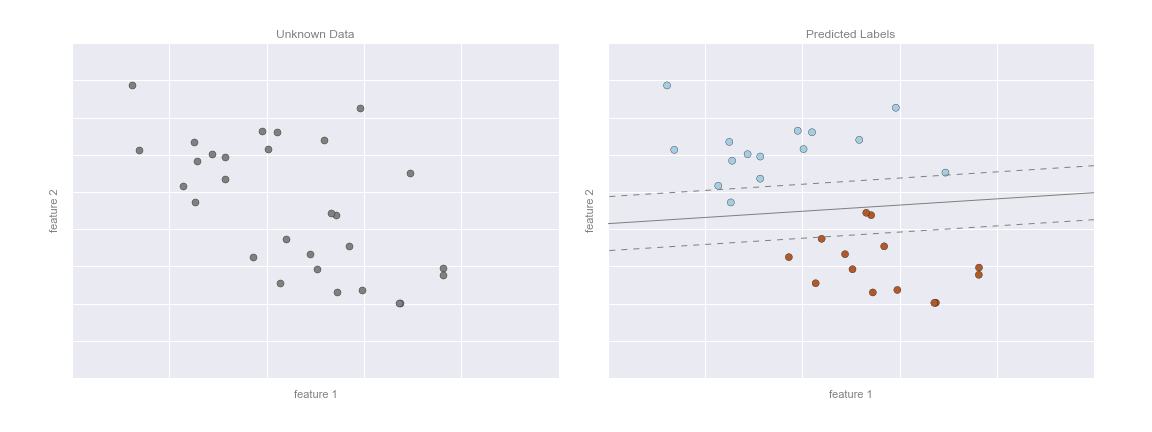

这就是机器学习中最基本的`分类`思想。

#### 5.1.2.2 回归：预测连续标签
回归任务与离散标签分类算法相反，其标签是连续值。如`图5-4`所示的数据集，所有样本的标签都在一个连续的区间内。和前面的分类示例一样，我们有一个二维数据，每个数据点有两个特征。数据点的颜色表示每个点的连续标签：
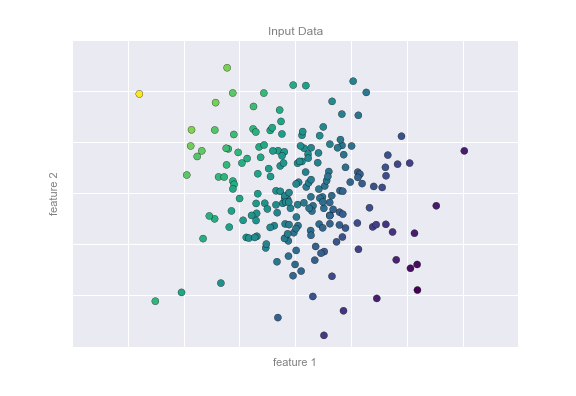


有许多可以处理这类数据的回归模型，但是我们还是用简单线性回归模型来预测数据。我们把标签看成是第三个维度，那么就可以将数据拟合成一个平面方程——这就是著名的在二维平面上线性拟合问题的高阶情形。

我们可以将数据可视化成`图5-5`的形式：
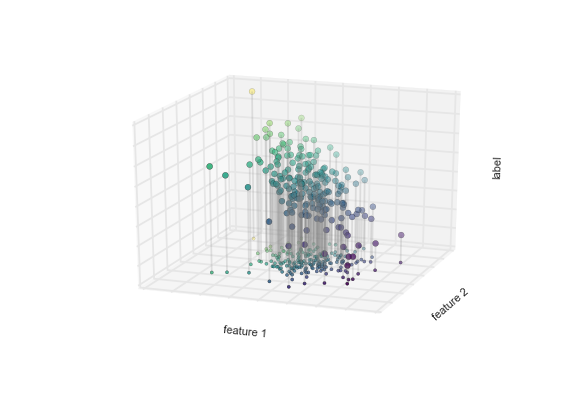

这里`特征1`与`特征2`平面与之前的二维图形是一样的，只不过用了颜色和三维坐标轴的位置表示标签。通过这个视角，就有理由相信：如果将三维数据拟合成一个平面，就可以对任何输入参数集进行预测。回到原来的二维投影图形上，拟合平面时获得的结果如`图5-6`所示：
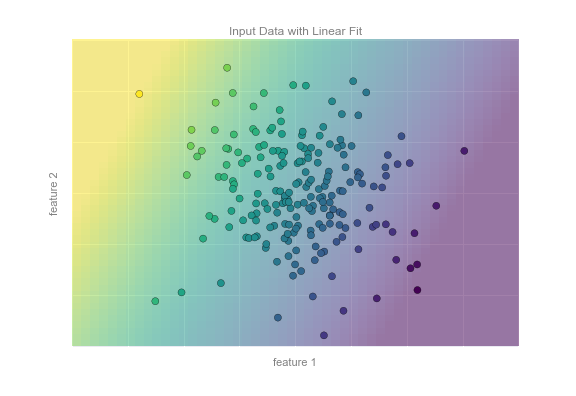

这个拟合平面为预测新数据点的标签提供了依据，我们可以直观地找到结果，如`图5-7`所示：
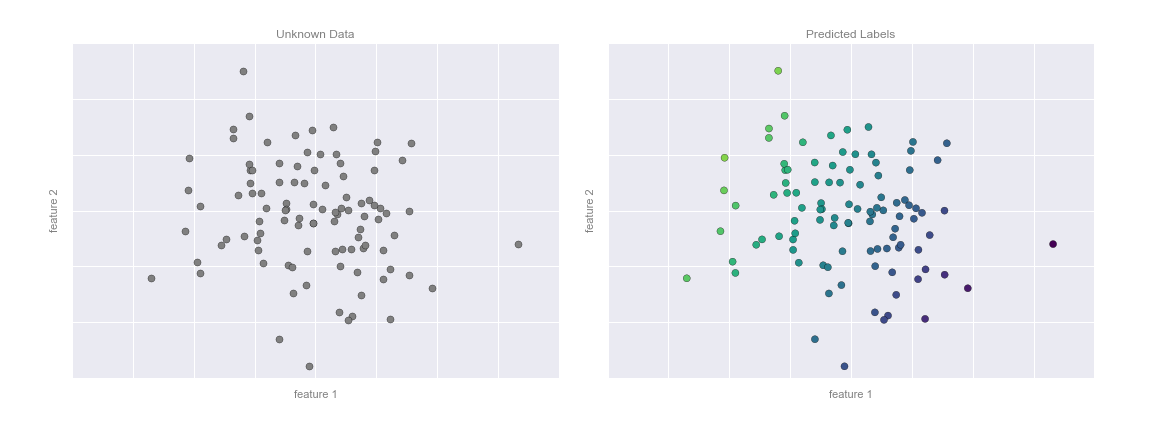

#### 5.1.2.3 聚类：为无标签数据添加标签
无监督学习涉及的模型将探索没有任何已知标签的数据。

无监督学习的普遍应用之一就是“聚类”——数据被聚类算法自动分成若干离散的组别。如`图5-8`所示的一组二维数据：
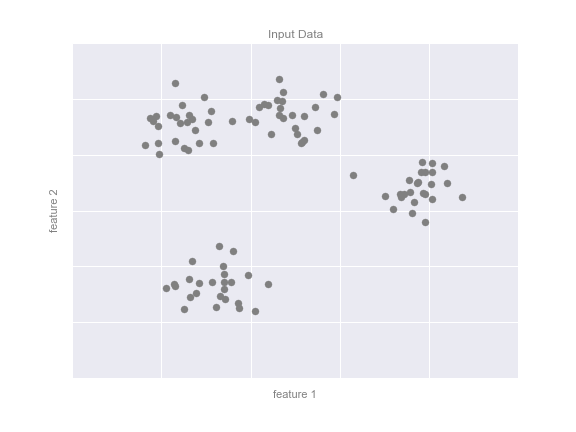

通过观察我们可以很清晰地判断出这些点应该归于哪个组。聚类模型会根据输入数据的固有结构判断数据点之间的相关性。通过最快、最直观的`k-means`聚类算法可以发现如`图5-9`所示的类簇(cluster)：
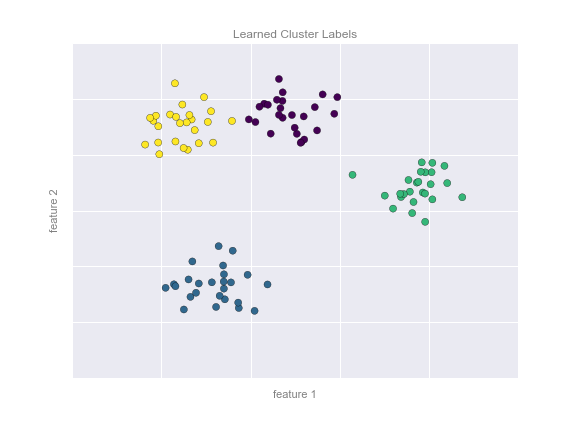

`k-means`会拟合出一个由`k`个簇中心点构成的模型，最优的簇中心点需要满足簇中的每个点到该中心的总距离最短。

#### 5.1.2.4 降维：推断无标签数据的结构
降维是另一种无监督算法示例，需要从数据集本身的结构推断标签和其他信息。虽然降维比之前看到的示例要抽象一些，但是一般来说，降维其实就是在保证高维数据质量的条件下从中抽取出一个低维数据集。

下面用一个示例进行演示，数据如`图5-10`所示：
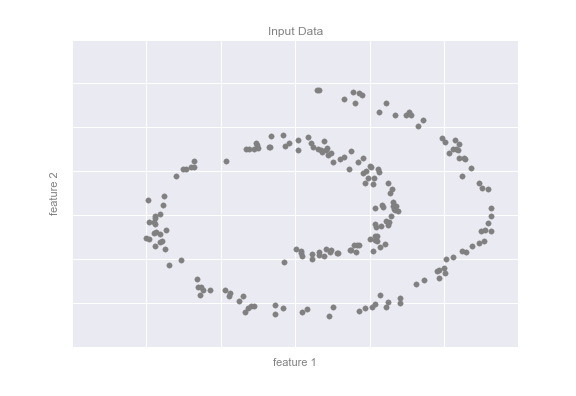

从图中可以清晰地看出数据存在某种结构：这些数据点在二维平面上按照一维螺旋线整齐地排列。从某种程度上，你可以说这些数据“本质上”只有一维，虽然这个一维数据是嵌在高维数据空间里的。适合这个示例的降维模型不仅需要满足数据的非线性嵌套结构，而且还要给出低维表现形式。

`图5-11`是通过Isomap算法得到的可视化结果：
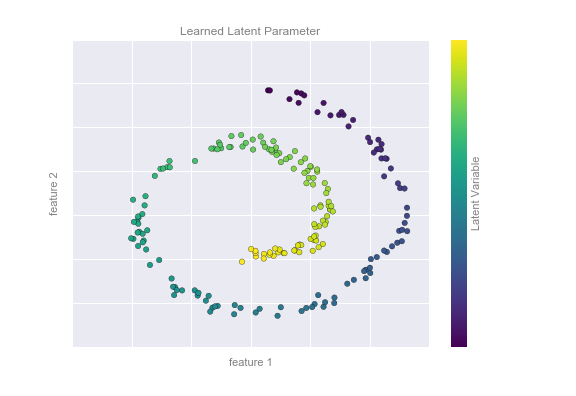

请注意，图中的颜色(表示算法提取到的一维潜在变量)沿着螺旋线呈现均匀变化，表明这个算法的确发现了肉眼所能观察到的结构。

## 5.2 Scikit-Learn简介
`Scikit-Learn`为各种常用机器学习算法提供了高效版本。`Scikit-Learn`不仅因其干净、统一、管道命令式的API而独具特色，而且它的在线文档实用完整。这种统一性的好处是，只要你掌握了`Scikit-Learn`一种模型的基本用法和语法，就可以非常平滑地过渡到新的模型或算法上。

本节内容对`Scikit-Learn`的API进行概述。真正理解这些API的组成部分将对更深入地理解机器学习算法与技巧大有裨益。

首先介绍`Scikit-Learn`的数据表示，然后介绍`评估器`API， 最后通过一个有趣的示例演示如何用这些工具探索手写数字图像。

### 5.2.1 Scikit-Learn的数据表示
机器学习是从数据创建模型的学问，因此你首先需要了解怎样表示数据才能让计算机理解。`Scikit-Learn`认为数据表示最好的方法就是用数据表的形式。

#### 5.2.1.1 数据表
基本的数据表就是二维网格数据，其中的每一行表示数据集中的每个样本，而列表示构成每个样本的相关特征。

我们用`Seaborn`程序库下载数据并加载到Pandas的DataFrame中：

In [2]:
iris = sns.load_dataset('iris') 
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


其中的每行数据表示每朵被观察的鸢尾花，行数表示数据集中记录的鸢尾花总数。一般情况下，会将这个矩阵的行称为`样本`(samples)，行数记为`n_samples`。

每列数据表示每个样本某个特征的量化值。一般情况下将矩阵的列称为`特征`(features)，列数记为`n_features`。

#### 5.2.1.2 特征矩阵
这个表格布局通过二维数组或矩阵的形式将信息清晰地表达出来，所以我们通常把这类矩阵称为`特征矩阵`(features matrix)，通常被简记为变量`X`。它是维度为`[n_samples, n_features]`，通常可以用NumPy数组、Pandas的DataFrame或SciPy的稀疏矩阵来表示。

#### 5.2.1.3 目标数组
除了特征矩阵外，我们还需要一个标签或目标数组，通常简记为`y`。目标数组一般是一维数组，其长度是`n_samples`，通常都用一维的NumPy数组或Pandas的Series表示。目标数组可以是连续的数值类型，也可以是离散的类型。这里我们使用鸢尾花的品种作为目标数组。

我们用Seaborn对数据进行可视化：

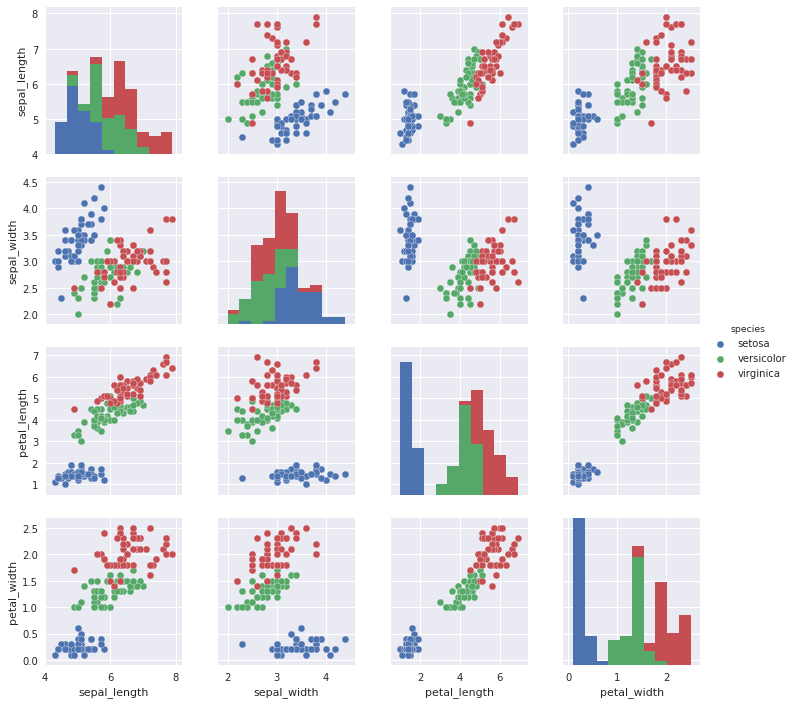

In [3]:
sns.pairplot(iris, hue='species', size=2.5)
plt.show()

在使用`Scikit-Learn`之前，我们需要从DataFrame中抽取`特征矩阵`和`目标数组`：

In [4]:
X_iris = iris.drop('species', axis=1) 
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species'] 
y_iris.shape

(150,)

有了适当的数据形式之后，就可以开始学习`Scikit-Learn`的评估器API了。

### 5.2.2 Scikit-Learn的评估器API
Scikit-LearnAPI主要遵照以下设计原则：
+ 统一性：所有对象使用共同接口连接一组方法和统一的文档
+ 内省：所有参数值都是公共属性
+ 限制对象层级：只有算法可以用Python类表示。数据集都用标准数据类型(NumPy数组、Pandas DataFrame、SciPy稀疏矩阵)表示，参数名称用标准的Python字符串
+ 函数组合：许多机器学习任务都可以用一串基本算法实现，`Scikit-Learn`尽力支持这种可能
+ 明智的默认值：当模型需要用户设置参数时，`Scikit-Learn`预先定义适当的默认值

只要你理解了这些设计原则，就会发现`Scikit-Learn`非常容易使用。`Scikit-Learn`中的所有机器学习算法都是通过`评估器`API实现的，它为各种机器学习应用提供了统一的接口。

#### 5.2.2.1 API基础知识
`评估器`API的常用步骤如下所示：
1. 通过从Scikit-Learn中导入适当的评估器类，选择模型类
2. 用合适的数值对模型类进行实例化，配置模型`超参数`(hyperparameter)
3. 整理数据，通过前面介绍的方法获取特征矩阵和目标数组
4. 调用模型实例的`fit()`方法对数据进行拟合
5. 对新数据应用模型：
    - 在有监督学习模型中，通常使用predict()方法预测新数据的标签
    - 在无监督学习模型中，通常使用transform()或predict()方法转换或推断数据的性质

下面按照步骤来演示几个使用了有监督学习方法和无监督学习方法的示例。

#### 5.2.2.2 有监督学习示例：简单线性回归
我们演示一个简单线性回归的建模步骤，为散点数据集`(x, y)`拟合一条直线。我们使用下面的样本数据来演示这个回归示例(如`图5-14`)：

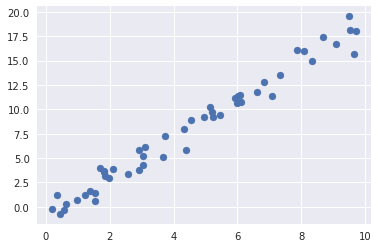

In [6]:
rng = np.random.RandomState(42) 
x = 10 * rng.rand(50) 
y = 2 * x - 1 + rng.randn(50) 
plt.scatter(x, y)
plt.show()

有了数据，就可以将前面介绍的步骤付诸实现了：

**(1)选择模型类**
在`Scikit-Learn`中，每个模型类都是一个Python类。我们使用线性回归模式`LinearRegression`

In [7]:
from sklearn.linear_model import LinearRegression

**(2)选择模型超参数**
当我们选择了模型类之后，还有许多参数需要配置。根据不同模型的不同情况，你可能需要回答以下问题：
+ 我们想要拟合偏移量(即直线的截距)吗？
+ 我们需要对模型进行归一化处理吗？
+ 我们需要对特征进行预处理以提高模型灵活性吗？
+ 我们打算在模型中使用哪种正则化类型？
+ 我们打算使用多少模型组件？

有一些重要的参数必须在选择模型类时确定好。这些参数通常被称为`超参数`，即在模型拟合数据之前必须被确定的参数。在`Scikit-Learn`中，我们通常在模型初始化阶段选择超参数。

对于线性回归来说，可以实例化`LinearRegression`类并用`fit_intercept`超参数设置是否想要拟合直线的截距：

In [8]:
model = LinearRegression(fit_intercept=True) 
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

需要注意的是，对模型进行实例化其实仅仅是存储了超参数的值。我们还没有将模型应用到数据上：`Scikit-Learn`的API对**选择模型**和**将模型应用到数据**区别得很清晰。

**(3)将数据整理成特征矩阵和目标数组**
`Scikit-Learn`的API需要二维特征矩阵和一维目标数组。我们的目标数组已经有了`y`(长度为`n_samples`的数组)，但还需要将数据`x`整理成`[n_samples, n_features]`的形式：

In [9]:
X = x[:, np.newaxis] 
X.shape

(50, 1)

**(4)用模型拟合数据**
现在就可以将模型应用到数据上了，这一步通过模型的`fit()`方法完成：

In [10]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

`fit()`命令会在模型内部进行大量运算，运算结果将存储在模型属性中。在`Scikit-Learn`中，所有通过`fit()`方法获得的模型参数都带一条下划线。在线性回归模型中，模型参数如下所示：

In [11]:
model.coef_, model.intercept_

(array([ 1.9776566]), -0.90331072553111458)

这两个参数分别表示对样本数据拟合直线的斜率和截距，与前面样本数据的定义(`斜率2`、`截距-1`)进行比对，发现拟合结果与样本非常接近。

> 模型参数的不确定性是机器学习经常遇到的问题。一般情况下，`Scikit-Learn`不会为用户提供直接从模型参数获得结论的工具；与其将模型参数解释为机器学习问题，不如说它更像统计建模问题。机器学习的重点并不是模型的预见性。如果你想要对模型拟合参数的意义和其他相关参数分析工具有更深入的理解，请参考[StatsModels Python程序包](http://statsmodels.sourceforge.net/)。

**(5)预测新数据的标签**
模型训练出来之后，我们用`predict()`方法进行预测。“新数据”是特征矩阵的`x`坐标值，我们用模型预测出目标数组的`y`轴坐标：

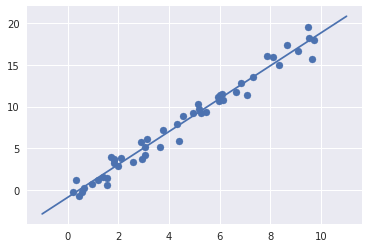

In [12]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis] 
yfit = model.predict(Xfit)

plt.scatter(x, y) 
plt.plot(xfit, yfit)
plt.show()

#### 5.2.2.3 有监督学习示例：鸢尾花数据分类
本节使用鸢尾花数据集，先建立模型，再用部分数据进行训练，最后预测出其他样本的标签。

我们将使用非常简单的`高斯朴素贝叶斯`(Gaussian naive Bayes)。这个方法假设每个特征中属于每一类的观测值都符合高斯分布。因为`高斯朴素贝叶斯`方法速度很快，而且不需要选择超参数，所以很适合在借助更复杂的模型进行优化之前，作为初步分类手段。

首先借助`train_test_split`函数将数据分割成训练集和测试集，之后使用训练集训练模型、使用测试集测试模型：

In [13]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

最后，用`accuracy_score`工具验证模型预测结果的准确率：

In [14]:
accuracy_score(ytest, y_model)

0.97368421052631582

准确率竟然高达`97%`，看来即使是非常简单的分类算法也可以有效地学习这个数据集！

#### 5.2.2.4 无监督学习示例：鸢尾花数据降维
本节将介绍一个无监督学习问题：对鸢尾花数据集进行降维以便可视化。

鸢尾花数据集由四个维度构成。降维是要找到一个可以保留数据本质特征的低维矩阵来表示高维数据。降维通常用于辅助数据可视化的工作，毕竟用二维数据画图比用四维甚至更高维的数据画图更方便！

下面将使用`主成分分析`(principal component analysis，PCA)方法，这是一种快速线性降维技术。我们将用模型返回两个主成分，也就是用二维数据表示鸢尾花的四维数据。

同样按照前面介绍过的建模步骤进行：

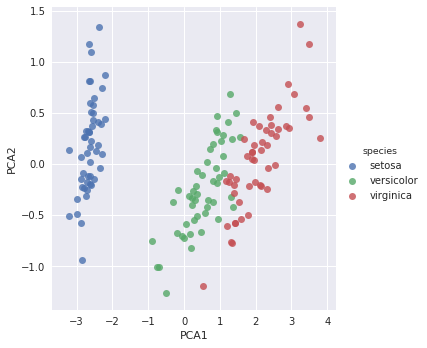

In [15]:
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1] 
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)
plt.show()

从上图可以看出，虽然`PCA`算法根本不知道花的种类标签，但不同种类的花还是被很清晰地区分开来！这表明用一种比较简单的分类方法就能够有效地学习这份数据集，就像前面看到的那样。

#### 5.2.2.5 无监督学习示例：鸢尾花数据聚类
聚类算法是要对没有任何标签的数据集进行分组。我们将用一个强大的聚类方法——`高斯混合模型`(Gaussian mixture model，GMM)。`GMM`模型试图将数据构造成若干服从高斯分布的概率密度函数簇：

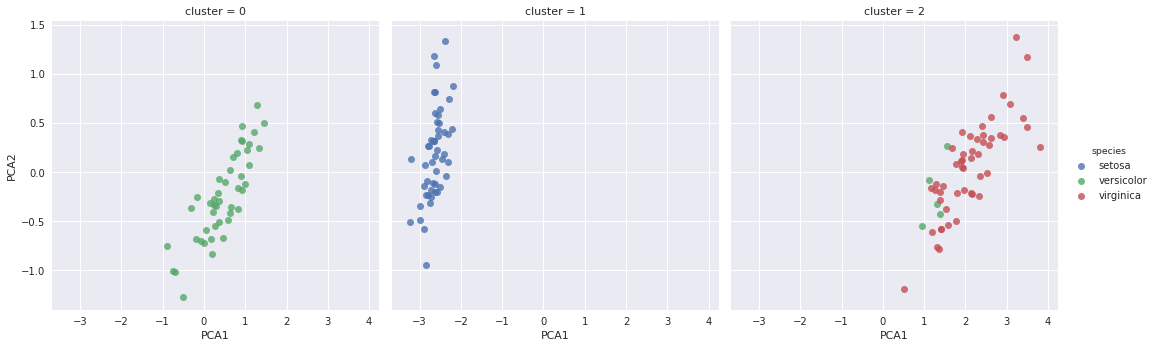

In [16]:
model = GaussianMixture(n_components=3, covariance_type='full') 
model.fit(X_iris) 
y_gmm = model.predict(X_iris)

iris['cluster'] = y_gmm 
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False)
plt.show()

根据簇数量对数据进行分割，就会清晰地看出`GMM`算法的训练效果：簇0和簇1完美地区分出来品种，唯一的遗憾是第三幅图中还有一点混淆。这就说明，即使没有专家告诉我们每朵花的具体种类，但由于每种花的特征差异很大，因此我们也可以通过简单的聚类算法自动识别出不同种类的花！这种算法还可以帮助专家们探索观察样本之间的关联性。

### 5.2.3 应用：手写数字探索
#### 5.2.3.1 加载并可视化手写数字
我们来挑战一个光学字符识别问题：手写数字识别。简单点说，这个问题包括图像中字符的定位和识别两部分。我们使用`Scikit-Learn`自带的手写数字数据集：

In [17]:
digits = load_digits() 
digits.images.shape

(1797, 8, 8)

这份图像数据是一个三维矩阵：共有1797个样本，每张图像都是`8像素×8像素`。对前100张图进行可视化(`图5-18`)：

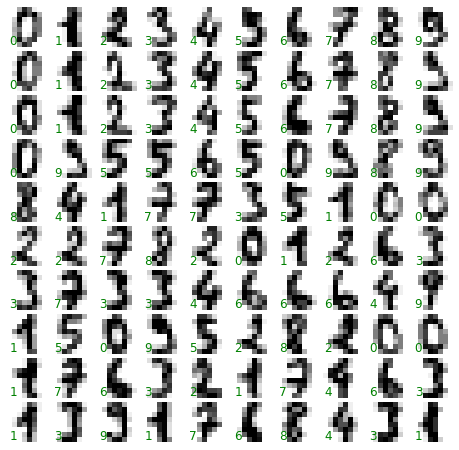

In [18]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),

subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest') 
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')
plt.show()

为了在`Scikit-Learn`中使用数据，需要一个维度为`[n_samples, n_features]`的二维特征矩阵。我们将每个样本图像的所有像素都作为特征，也就是将每个数字的`8像素×8像素`平铺成长度为64的一维数组。另外，还需要一个目标数组，用来表示每个数字的真实值。这两份数据已经放在手写数字数据集的`data`与`target`属性中：

In [19]:
X = digits.data
X.shape

(1797, 64)

In [20]:
y = digits.target 
y.shape

(1797,)

#### 5.2.3.2 无监督学习：降维
对具有64维参数空间的样本进行可视化十分困难。因此，我们借助无监督学习方法将维度降到二维。我们使用`Isomap`算法对数据进行降维：

In [21]:
iso = Isomap(n_components=2) 
iso.fit(digits.data) 
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

现在数据已经投影到二维，如`图5-19`所示：

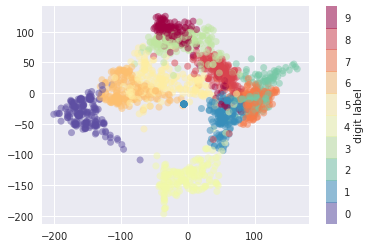

In [22]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolor='none', 
            alpha=0.5, cmap=plt.cm.get_cmap('Spectral_r', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

这幅图非常直观显示出数字在64维空间中的分离(可识别)程度：
+ 数字0和数字1基本不会重叠，根据常识也应该是如此，数字0是中间一片空白，而数字1是中间一片黑
+ 数字1和数字4好像有点儿混淆——也许是有些人写数字1的时候喜欢在上面加个“帽子”，因此看起来就像是数字4

虽然有些瑕疵，但从总体上看，各个数字在参数空间中的分离程度还是令人满意的。**这其实告诉我们：用一个非常简单的有监督分类算法就可以完成任务。下面来演示一下**。

#### 5.2.3.3 数字分类
我们将数据分成训练集和测试集，然后用高斯朴素贝叶斯模型来拟合：

In [23]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

model = GaussianNB() 
model.fit(Xtrain, ytrain) 
y_model = model.predict(Xtest)
accuracy_score(ytest, y_model)

0.83333333333333337

数字识别率达到`80%`以上。但仅依靠这个指标，我们无法知道模型哪里做得不够好，解决这个问题的办法就是用`混淆矩阵`(confusion matrix)。可以用`Scikit-Learn`计算混淆矩阵，然后用`Seaborn`画出来(`图5-20`)：

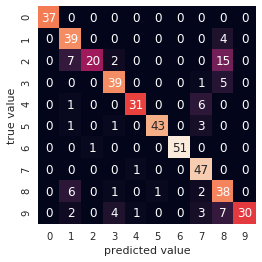

In [24]:
mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False) 
plt.xlabel('predicted value') 
plt.ylabel('true value')
plt.show()

从图中可以看出，误判的主要原因在于许多数字2被误判成了数字1或8。

另一种显示模型特征的直观方式是将样本画出来，然后把预测标签放在左下角，用绿色表示预测正确，用红色表示预测错误(`图5-21`)：

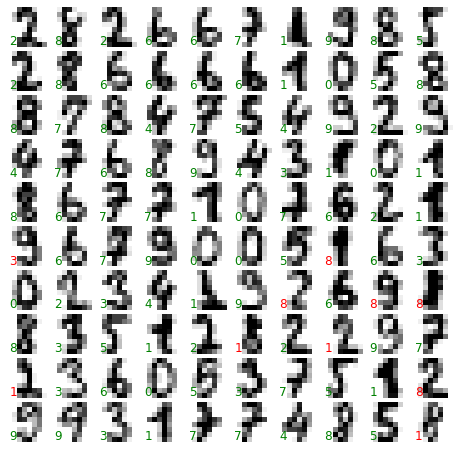

In [25]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),subplot_kw={'xticks':[], 'yticks':[]}, 
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images=Xtest.reshape(-1,8,8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest') 
    ax.text(0.05, 0.05, str(y_model[i]), transform=ax.transAxes, 
            color='green' if (ytest[i] == y_model[i]) else 'red')

plt.show()

## 5.3 超参数与模型验证
在上一节中，我们介绍了有监督机器学习模型的基本步骤：
1. 选择模型类
2. 选择模型超参数
3. 用模型拟合训练数据
4. 用模型预测新数据的标签

`模型选择`和`超参数选择`是有效使用各种机器学习工具和技术的最重要阶段。为了作出正确的选择，我们需要一种方式来验证选中的模型和超参数是否可以很好地拟合数据。这看起来是很简单，但要顺利地完成必须避过很多坑。

### 5.3.1 什么是模型验证
`模型验证`就是在选择模型和超参数之后，通过对训练数据进行学习，对比模型对已知数据的预测值与实际值的差异。

我们先通过一个简单方法实现模型验证，告诉你为什么那样做行不通。之后，介绍如何用`留出集`(holdout set)与`交叉检验`(cross-validation)实现更可靠的模型验证。

#### 5.3.1.1 错误的模型验证方法
我们用鸢尾花数据演示一个简单的模型验证方法：

In [26]:
iris = load_iris() 
X = iris.data 
y = iris.target

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y) 

y_model = model.predict(X)
accuracy_score(y, y_model)

1.0

模型识别标签的正确率是`100%`！但是这样测量的准确率可靠吗？答案是否定的。这个方法有个根本缺陷：它用同一套数据训练和评估模型。

#### 5.3.1.2 模型验证正确方法：留出集
`留出集`可以更好地评估模型性能，即先从训练模型的数据中留出一部分，然后用这部分留出来的数据来检验模型性能。在`Scikit-Learn`里面用`train_test_split`工具可以实现：

In [27]:
iris = load_iris() 
X = iris.data 
y = iris.target

# 每个数据集分一半数据 
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)

# 用模型拟合训练数据 
model.fit(X1, y1)

# 在测试集中评估模型准确率 
y2_model = model.predict(X2) 
accuracy_score(y2, y2_model)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.90666666666666662

这样就可以获得更合理的结果了：最近邻分类器在这份留出集上的准确率是`90%`。 这里的`留出集`类似新数据，因为模型之前没有“接触”过它们。

#### 5.3.1.3 交叉校验
`留出集`进行模型验证有一个缺点，就是模型失去了一部分训练机会。在上面的模型中，有一半数据都没有为模型训练做出贡献。这显然不是最优解，而且可能还会出现问题，尤其是在训练数据集规模比较小的时候。

解决这个问题的方法是交叉检验，也就是做一组拟合，让数据的每个子集既是训练集，又是验证集。用图形来说明的话，就如`图5-22`所示：
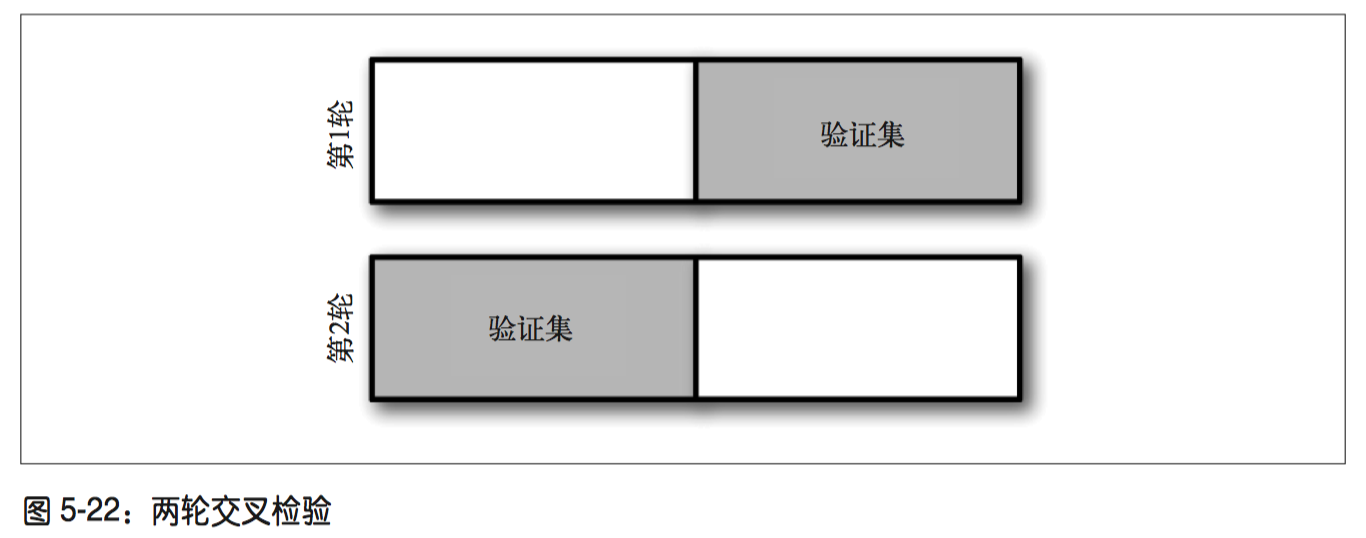

这里进行了两轮验证实验，轮流用一半数据作为留出集：

In [28]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1) 
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.95999999999999996, 0.90666666666666662)

求两个准确率的均值获取一个更准确的模型总体性能。我们还可以实现更多轮的实验，`图5-23`是一个五轮交叉检验：
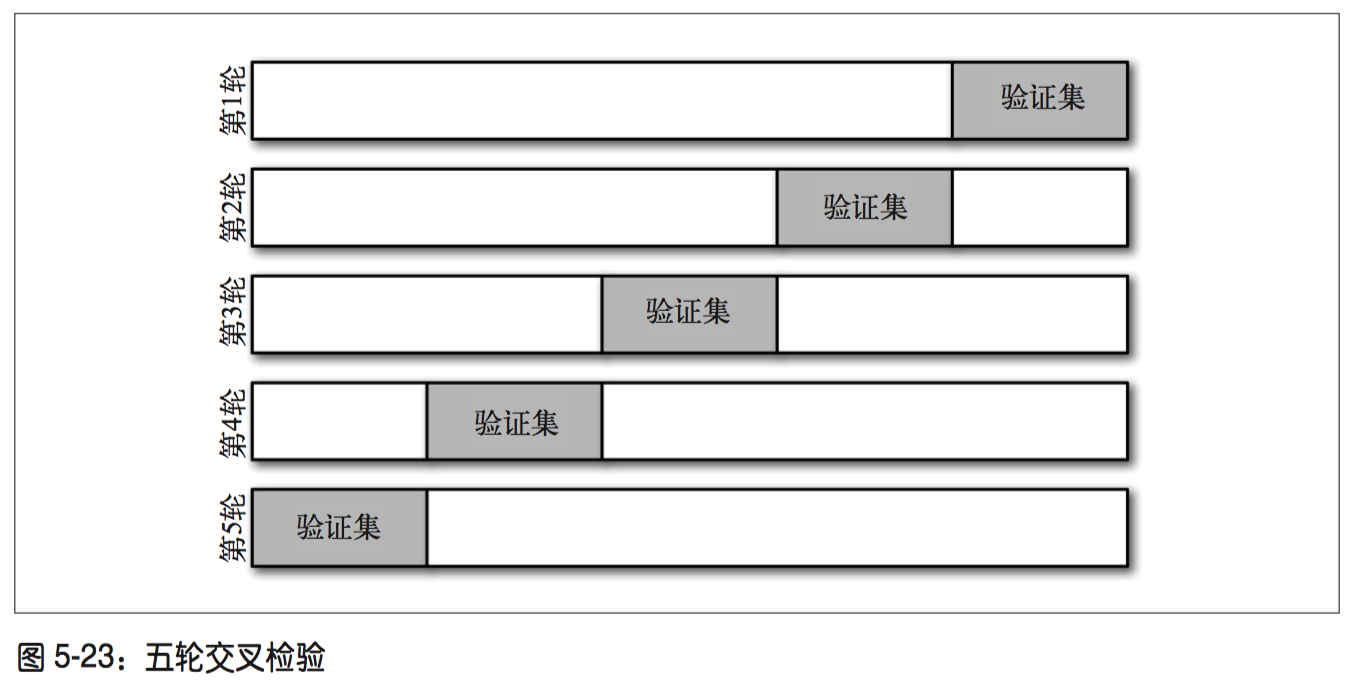

把数据分成五组，每一轮依次用模型拟合其中的四组数据，再预测第五组数据，评估模型准确率。`Scikit-Learn`的`cross_val_score`函数可以非常简便地实现：

In [29]:
cross_val_score(model, X, y, cv=5)

array([ 0.96666667,  0.96666667,  0.93333333,  0.93333333,  1.        ])

对数据的不同子集重复进行交叉检验，可以让我们对算法的性能有更好的认识。

`Scikit-Learn`为不同应用场景提供了各种交叉检验方法，都以`迭代器`(iterator)形式在`cross_validation`模块中实现。例如，我们可能会遇到交叉检验的轮数与样本数相同的极端情况，也就是说我们每次只有一个样本做测试，其他样本全用于训练。这种交叉检验类型被称为`LOO`(leave-one-out，只留一个)交叉检验，具体用法如下：

In [30]:
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X))) 
scores

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

留一法交叉检验会生成150轮试验，每次试验的预测结果要么成功(得分1.0)，要么失败(得分0.0)。计算所有试验准确率的均值：

In [31]:
scores.mean()

0.95999999999999996

其他交叉检验机制的用法大同小异。`Scikit-Learn`交叉检验的内容参考[文档](http://scikit-learn.org/stable/modules/cross_validation.html)。

### 5.3.2 选择最优模型
了解了验证与交叉检验的基础知识之后，我们看看如何选择模型和超参数。这是机器学习实践中最重要的部分。

关键问题是：假如***模型效果不好应该如何改善？***答案可能有以下几种
+ 用更复杂/更灵活的模型
+ 用更简单/更确定的模型
+ 采集更多的训练样本
+ 为每个样本采集更多的特征

问题的答案往往与直觉相悖。换一种更复杂的模型有时可能产生更差的结果，增加更多的训练样本也未必能改善性能！改善模型能力的高低，是区分机器学习实践者成功与否的标志。

#### 5.3.2.1 偏差与方差的均衡
`最优模型`的问题基本可以看成是找出偏差与方差平衡点的问题。`图5-24`显示的是对同一数据集拟合的两种回归模型：
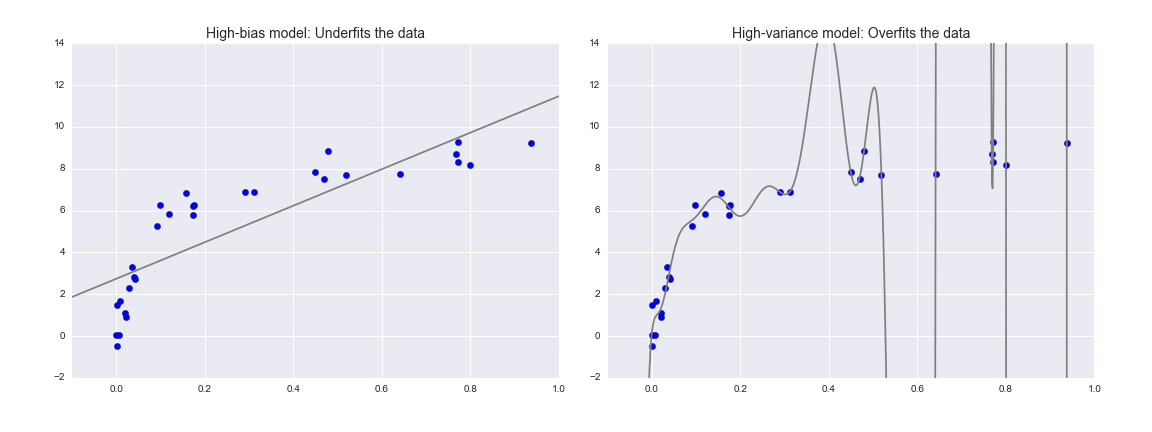

显然，这两个模型拟合得都不是很好，但它们的问题却是不一样的：
+ 左边的模型希望从数据中找到一条直线。但由于数据本质上比直线要复杂，直线永远不可能很好地描述这份数据。这样的模型被认为是对数据欠拟合；也就是说，模型没有足够的灵活性来适应数据的所有特征。另一种说法就是模型具有高偏差
+ 右边的模型希望用高阶多项式拟合数据。虽然这个模型有足够的灵活性可以近乎完美地适应数据的所有特征，但与其说它是十分准确地描述了训练数据，不如说它是过多地学习了数据的噪音，而不是数据的本质属性。这样的模型被认为是对数据过拟合，也就是模型过于灵活，在适应数据所有特征的同时，也适应了随机误差。另一种说法就是模型具有高方差。

现在换个角度，如果用两个模型分别预测`y`轴的数据，看看是什么效果。`图5-25`中浅红色的点是被预测数据集遗漏的点：
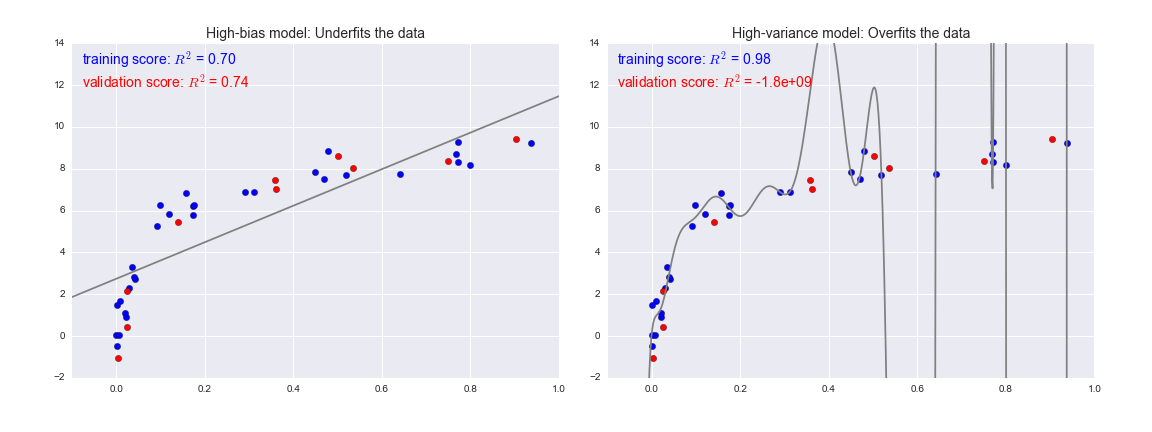

图上的分数$R^2$称为[判定系数](https://en.wikipedia.org/wiki/Coefﬁcient_of_determination)， 用来衡量模型与目标值均值的对比结果。 $R^2 = 1$表示模型与数据完全吻合，$R^2 = 0$表示模型不比简单取均值好，$R^2$为负表示模型性能很差。

从这两个模型的得分可以得出两条一般性的结论：
+ 对于高偏差模型，模型在验证集的表现与在训练集的表现类似
+ 对于高方差模型，模型在验证集的表现远远不如在训练集的表现

如果我们有能力不断调整模型的复杂度，那么我们可能希望训练得分和验证得分如`图5-26`所示。
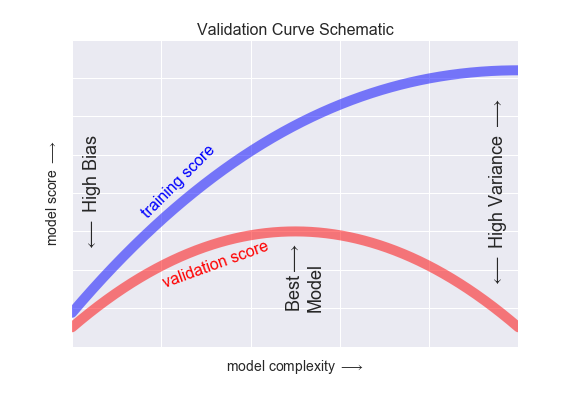

`图5-26`通常被称为验证曲线，具有以下特征：
+ 训练得分肯定高于验证得分。一般情况下，模型拟合自己接触过的数据，比拟合没接触过的数据效果要好
+ 使用复杂度较低的模型(高偏差)时，训练数据往往欠拟合，说明模型对训练数据和新数据都缺乏预测能力
+ 使用复杂度较高的模型(高方差)时，训练数据往往过拟合，说明模型对训练数据预测能力很强，但是对新数据的预测能力很差
+ 当使用复杂度适中的模型时，验证曲线得分最高。说明在该模型复杂度条件下，偏差与方差达到均衡状态

不同模型复杂度的调整方法大不相同。

#### 5.3.2.2 Scikit-Learn验证曲线
我们用交叉检验计算一个模型的验证曲线。这里使用多项式回归模型，它是线性回归模型的一般形式，其多项式的次数是一个可调参数。例如，多项式次数为1就是将数据拟合成一条直线。若模型有参数`a`和`b`，则模型为：
+ $y = ax + b$

多项式次数为3，则将数据拟合成一条三次曲线。若模型有参数`a`、`b`、`c`、`d`，则模型为：
+ $y = ax^3 + bx^2 + cx + d$

推而广之，就可以得到任意次数的多项式。

在`Scikit-Learn`中，可以用一个带多项式预处理器的简单线性回归模型实现。我们将用一个管道命令来组合这两种操作(多项式特征与管道命令将在`5.4节`介绍)：

In [32]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

# 造一些数据给模型拟合
def make_data(N, err=1.0, rseed=1):
    # 随机轴样数据 
    rng = np.random.RandomState(rseed) 
    X = rng.rand(N, 1) ** 2 
    y = 10 - 1. / (X.ravel() + 0.1) 
    if err > 0:
        y += err * rng.randn(N) 
    return X, y

X, y = make_data(40)

通过数据可视化，将不同次数的多项式拟合曲线画出来(`图5-27`所示)：

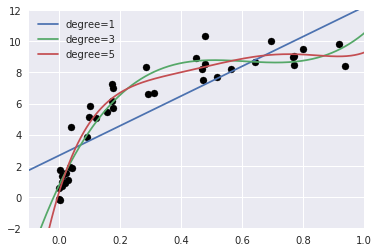

In [33]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black') 
axis = plt.axis() 

for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree)) 
    
plt.xlim(-0.1, 1.0) 
plt.ylim(-2, 12) 
plt.legend(loc='best')
plt.show()

控制模型复杂度的关键是多项式的次数，它只要是非负整数就可以。那么问题来了：究竟多项式的次数是多少，才能在偏差(欠拟合)与方差(过拟合)间达到平衡？

我们通过可视化验证曲线来回答这个问题。利用`Scikit-Learn`的`validation_curve`函数，提供模型、数据、参数名称和验证范围信息，函数就会自动计算验证范围内的训练得分和验证得分(`图5-28`)：

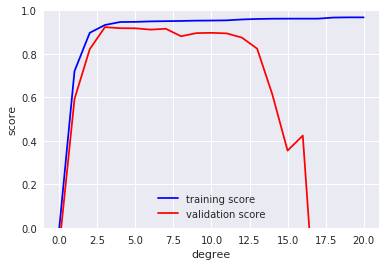

In [34]:
degree = np.arange(0, 21) 
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score') 
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score') 
plt.legend(loc='best') 
plt.ylim(0, 1) 
plt.xlabel('degree') 
plt.ylabel('score')
plt.show()

这幅图可以准确显示我们想要的信息：训练得分总是比验证得分高；训练得分随着模型复杂度的提升而单调递增；验证得分增长到最高点后由于过拟合而开始骤降。

从验证曲线中可以看出，偏差与方差均衡性最好的是三次多项式。我们可以计算结果，并将模型画在原始数据上(`图5-29`)：

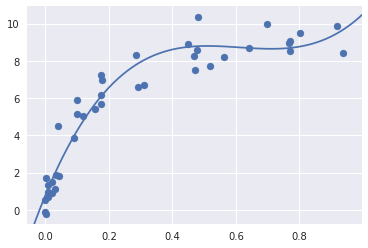

In [35]:
plt.scatter(X.ravel(), y)
lim = plt.axis() 
y_test = PolynomialRegression(3).fit(X, y).predict(X_test) 
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)
plt.show()

虽然寻找最优模型并不需要我们计算训练得分，但是检查训练得分与验证得分之间的关系可以让我们对模型的性能有更加直观的认识。

### 5.3.3 学习曲线
影响模型复杂度的另一个重要因素是最优模型往往受到训练数据量的影响。例如，生成前面5倍的数据(`图5-30`)：

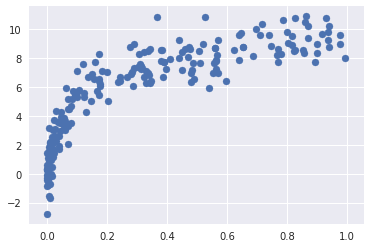

In [36]:
X2, y2 = make_data(200) 
plt.scatter(X2.ravel(), y2)
plt.show()

用前面的方法画出这个大数据集验证曲线。为了对比，把之前的曲线也画出来(`图5-31`)：

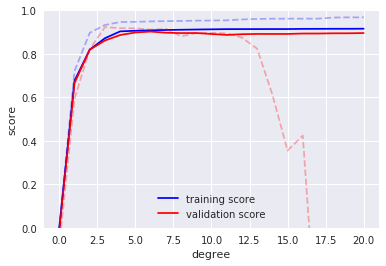

In [37]:
degree = np.arange(21) 
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, 
                                            'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score') 
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score') 
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed') 
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed') 
plt.legend(loc='lower center') 
plt.ylim(0, 1) 
plt.xlabel('degree') 
plt.ylabel('score')
plt.show()

从验证曲线可以明显看出，大数据集支持更复杂的模型：虽然得分顶点大概是六次多项式，但是即使到了二十次多项式，过拟合情况也不太严重，验证得分与训练得分依然十分接近。

**通过观察验证曲线的变化趋势，可以发现有两个影响模型效果的因素：模型复杂度和训练数据集的规模**。通常，我们将模型看成是与训练数据规模相关的函数，通过不断扩大数据集的规模来拟合模型，以此来观察模型的行为。反映训练集规模的训练得分/验证得分曲线被称为`学习曲线`(learning curve)。

学习曲线的特征包括：
+ 特定复杂度的模型对较小的数据集容易过拟合：此时训练得分较高，验证得分较低
+ 特定复杂度的模型对较大的数据集容易欠拟合：随着数据的增大，训练得分会不断降低，而验证得分会不断升高
+ 模型的验证集得分永远不会高于训练集得分：两条曲线一直在靠近，但永远不会交叉。

有了这三条特征就可以画出`图5-32`所示的学习曲线：
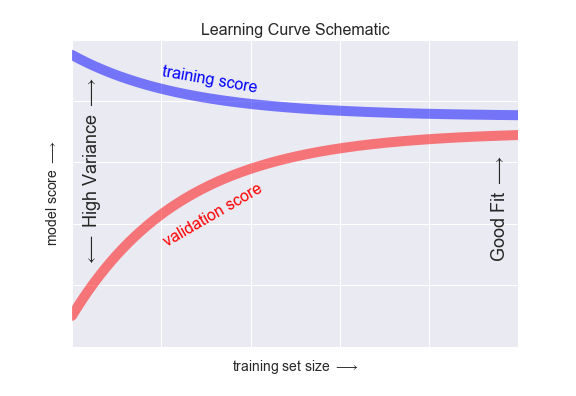

学习曲线最重要的特征是，随着训练样本数量的增加，分数会收敛到定值；一旦的数据多到使模型得分已经收敛，那么增加更多的训练样本也无济于事！改善模型性能的唯一方法就是换模型更复杂的模型。

#### 5.3.3.1 Scikit-Learn学习曲线
`Scikit-Learn`计算模型学习曲线的函数非常简单。下面来计算前面数据集的二次多项式模型和九次多项式模型的学习曲线(`图5-33`)：

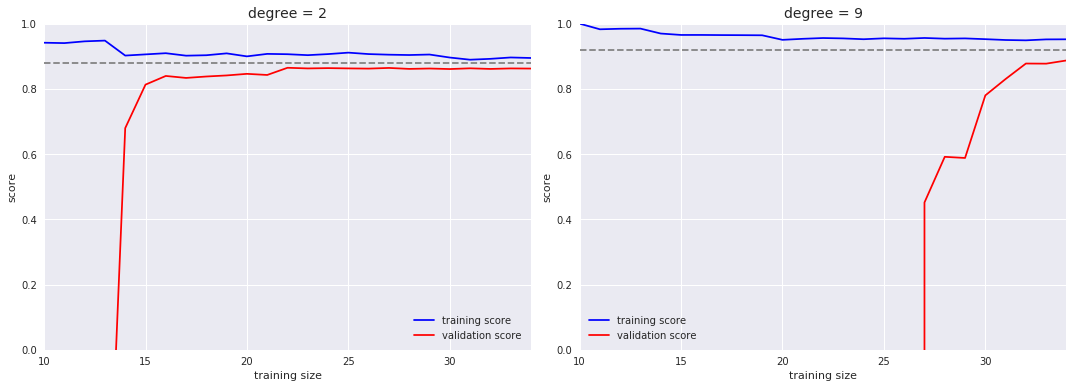

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6)) 
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), 
                                         X, y, cv=7, 
                                         train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score') 
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score') 
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], 
                 color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1) 
    ax[i].set_xlim(N[0], N[-1]) 
    ax[i].set_xlabel('training size') 
    ax[i].set_ylabel('score') 
    ax[i].set_title('degree = {0}'.format(degree), size=14) 
    ax[i].legend(loc='best')
plt.show()

这幅图展现了模型得分随着训练数据规模的变化而变化。尤其是当学习曲线已经收敛时，再增加训练数据也不能再显著改善拟合效果！这种情况就类似于左图显示的二次多项式模型的学习曲线。

提高收敛得分的唯一办法就是换更复杂的模型。如右图所示：采用复杂度更高的模型之后，虽然学习曲线的收敛得分提高了(对比虚线所在位置)，但是模型的方差也变大了(对比训练得分与验证得分的差异)。如果我们为复杂度更高的模型继续增加训练数据，那么学习曲线最终也会收敛。

为模型和数据集画出学习曲线，可以帮你找到正确的方向，不断改进学习的效果。

### 5.3.4 验证实践：网格搜索
我们对偏差与方差的均衡有了直观的认识，它们与模型的复杂度和训练集的大小有关。在实际工作中，模型通常会有多个得分转折点，因此验证曲线和学习曲线 的图形会从二维曲线变成多维曲面。这种高维可视化很难展现，因此从图中找出验证得分的最大值也不是一件简单的事。

`Scikit-Learn`在`grid_search`提供了一个自动化工具解决这个问题。下面是用网格搜索寻找最优多项式回归模型。我们将在模型特征的三维网格中寻找最优值，包括多项式的次数的搜索范围、回归模型是否拟合截距、以及回归模型是否需要进行标准化处理。我们用`Scikit-Learn`的`GridSearchCV`元评估器来设置这些参数：

In [39]:
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False], 
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

和普通的评估器一样，这个元评估器此时还没有应用到任何数据上。调用`fit()`方法在每个网格点上拟合模型，并同时记录每个点的得分：

In [40]:
grid.fit(X, y)

# 模型拟合完成后就可以获取最优参数了
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

还可以用最优参数的模型拟合数据，并画图显示(`图5-34`)：

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:3356: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


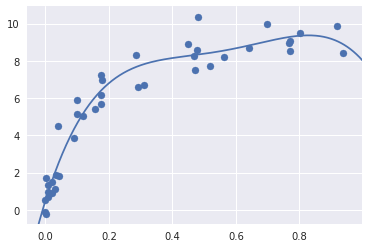

In [41]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y) 
lim = plt.axis() 
y_test = model.fit(X, y).predict(X_test) 
plt.plot(X_test.ravel(), y_test, hold=True)
plt.axis(lim)
plt.show()

## 5.4 特征工程
之前的所有示例都假设已经拥有一个干净的`[n_samples, n_features]`特征矩阵。在现实工作中，数据很少会这么干净。因此，机器学习实践中更重要的步骤之一是`特征工程`(feature engineering)，即找到与问题有关的任何信息，把它们转换成特征矩阵的数值。

本节将介绍特征工程的一些常见示例：表示分类数据的特征、表示文本的特征和表示图像的特征。另外，还会介绍提高模型复杂度的衍生特征和处理缺失数据的填充方法。这个过程通常被称为`向量化`，因为它把任意格式的数据转换成具有良好特性的向量形式。

### 5.4.1 分类特征
一种常见的非数值数据类型是分类数据。例如，房屋数据除了有`房价`(price)和`面积`(rooms)之类的数值特征，还会有`地点`(neighborhood)信息：

In [42]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'}, 
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'}, 
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'}, 
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'} ]

你可能会把分类特征用映射关系编码成整数：

In [43]:
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};

但是，在`Scikit-Learn`中这么做并不是一个好办法：这个程序包的所有模块都有一个基本假设，那就是数值特征可以反映`代数量`(algebraic quantities)。因此，这样映射编码可能会让人觉得存在`Queen Anne < Fremont < Wallingford`，甚至还有`Wallingford - Queen Anne = Fremont`，这显然是没有意义的。

面对这种情况，常用的解决方法是One-Hot编码，用`ScikitLearn`的`DictVectorizer`类就可以实现：

In [45]:
vec = DictVectorizer(sparse=False, dtype=int) 
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]], dtype=int64)

`neighborhood`字段转换成三列来表示三个地点标签，`1`所在的列对应一个地点。分类特征编码之后，就可以象之前一样拟合`Scikit-Learn`模型了。

可以用下面的代码查看每一列的含义：

In [46]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

这种方法有一个显著的缺陷：如果分类特征有许多枚举值，那么数据集的维度就会急剧增加。然而，由于被编码的数据中有许多`0`，因此用稀疏矩阵表示会非常高效：

In [47]:
vec = DictVectorizer(sparse=True, dtype=int) 
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

在拟合和评估模型时，`Scikit-Learn`的许多(并非所有)评估器都支持稀疏矩阵输入。`sklearn.preprocessing.OneHotEncoder`和`sklearn.feature_extraction.FeatureHasher`是 Scikit-Learn 另外两个为分类特征编码的工具。

### 5.4.2 文本特征
另一种常见的特征工程需求是将文本转换成一组数值。例如，绝大多数社交媒体数据的自动化采集，都是依靠将文本编码成数字的技术手段。数据采集最简单的编码方法之一就是单词统计：给你几个文本，让你统计每个词出现的次数，然后放到表格中。

例如下面三个短语：

In [48]:
sample = ['problem of evil', 'evil queen', 'horizon problem']

面对单词统计的数据向量化问题时，可以创建一个列来表示单词`problem`、单词`evil`和单词`horizon`等。使用`Scikit-Learn`的`CountVectorizer`可以轻松实现：

In [50]:
vec = CountVectorizer() 
X = vec.fit_transform(sample) 
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

结果是一个稀疏矩阵，里面记录了每个短语中每个单词的出现次数。如果用带列标签的`DataFrame`来表示这个稀疏矩阵就更方便了：

In [51]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


不过这种统计方法也有一些问题：原始的单词统计会让一些常用词聚集太高的权重。解决这个问题的方法就是通过`TF–IDF`，通过单词在文档中出现的频率来衡量其权重。计算这些特征的语法和之前的示例类似：

In [53]:
vec = TfidfVectorizer() 
X = vec.fit_transform(sample) 
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


### 5.4.3 图像特征
机器学习还有一种常见需求是对图像进行编码。处理手写数字图像时使用的方法是最简单的图像编码方法：用像素表示图像。但是在其他类型的任务中，这类方法可能不太合适。

完整地介绍图像特征的提取技术超出了本章的范围，你可以在[Scikit-Image](http://scikit-image.org)中找到许多标准方法的高品质实现。关于`Scikit-Image`的示例，请参见`5.14`节。

### 5.4.4 衍生特征
还有一种有用的特征是输入特征经过数学变换衍生出来的新特征。我们在`5.3`节从输入数据中构造多项式特征时，曾经见过这类特征。我们发现将一个线性回归转换成多项式回归时，并不是通过改变模型来实现，而是通过改变输入数据！这种处理方式有时被称为`基函数回归`(basis function regression)，详细请参见`5.6`节。

例如，下面的数据显然不能用一条直线描述(`图5-35`)：

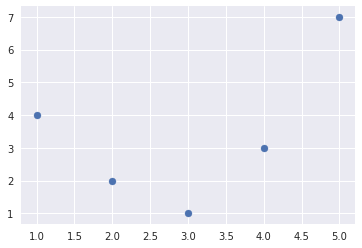

In [54]:
x = np.array([1, 2, 3, 4, 5]) 
y = np.array([4, 2, 1, 3, 7]) 
plt.scatter(x, y)
plt.show()

但是我们仍然用`LinearRegression`拟合出一条直线，并获得直线的最优解(`图5-36`)：

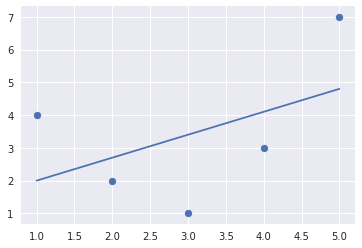

In [55]:
X = x[:, np.newaxis] 
model = LinearRegression().fit(X, y)
yfit = model.predict(X) 
plt.scatter(x, y) 
plt.plot(x, yfit)
plt.show()

很显然，我们需要用一个更复杂的模型来描述`x`与`y`的关系。可以对数据进行变换，并增加额外的特征来提升模型的复杂度。例如，可以在数据中增加多项式特征，即将$x$扩展为$x$、$x^2$、$x^3$：

In [56]:
poly = PolynomialFeatures(degree=3, include_bias=False) 
X2 = poly.fit_transform(X) 
X2

array([[   1.,    1.,    1.],
       [   2.,    4.,    8.],
       [   3.,    9.,   27.],
       [   4.,   16.,   64.],
       [   5.,   25.,  125.]])

通过对这个扩展的输入矩阵计算线性回归，就可以获得更接近原始数据的结果了(`图5-37`)：

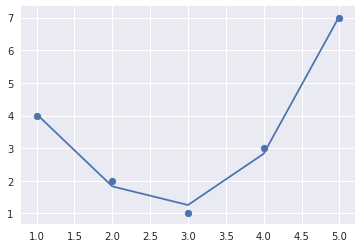

In [57]:
model = LinearRegression().fit(X2, y) 
yfit = model.predict(X2) 
plt.scatter(x, y) 
plt.plot(x, yfit)
plt.show(0)

### 5.4.5 缺失值填充
特征工程中还有一种常见需求是处理缺失值。例如有如下数据集：

In [59]:
X = np.array([[np.nan, 0, 3], 
              [3, 7, 9], 
              [3, 5, 2], 
              [4, np.nan, 6], 
              [8, 8, 1 ]]) 
y = np.array([14, 16, -1, 8, -5])

在应用机器学习模型之前，首先需要用适当的值替换这些缺失数据，这个操作被称为`缺失值填充`，相应的策略很多，有的简单(如用列均值替换缺失值)，有的复杂(如用矩阵填充或其他模型来处理缺失值)。

复杂方法在不同的应用中各不相同，这里不再深入介绍。对于一般的填充方法，如均值、中位数、众数，`Scikit-Learn`有`Imputer`类可以实现：

In [61]:
imp = Imputer(strategy='mean') 
X2 = imp.fit_transform(X) 
X2

array([[ 4.5,  0. ,  3. ],
       [ 3. ,  7. ,  9. ],
       [ 3. ,  5. ,  2. ],
       [ 4. ,  5. ,  6. ],
       [ 8. ,  8. ,  1. ]])

结果矩阵中的两处缺失值都被所在列剩余数据的均值替代了。填充后的数据就可以直接放到评估器里训练：

In [62]:
model = LinearRegression().fit(X2, y) 
model.predict(X2)

array([ 13.14869292,  14.3784627 ,  -1.15539732,  10.96606197,  -5.33782027])

### 5.4.6 特征管道
实际应用中经常需要将多个步骤串起来使用时。例如：
1. 用均值填充缺失值
2. 将衍生特征转换为二次方
3. 拟合线性回归模型

为了实现这种处理过程，`Scikit-Learn`提供了一个管道对象：

In [65]:
model = make_pipeline(Imputer(strategy='mean'), PolynomialFeatures(degree=2), LinearRegression())
model.fit(X, y) # 和上面一样，X带有缺失值 
print(y) 
print(model.predict(X))

[14 16 -1  8 -5]
[ 14.  16.  -1.   8.  -5.]


所有的步骤都自动完成。*注意，出于简化演示考虑，将模型应用到已经训练过的数据上，模型能够非常完美地预测结果*。